In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
ts = 'TIME_SERIES_INTRADAY'#'TIME_SERIES_DAILY'
interval = '1min'
api_key = '' 
outputsize = 'full' # compact=100 results, full= all data (5 days?)
def getIntraday1minDF(symbol): 
    link = 'https://www.alphavantage.co/query?function={}&symbol={}&interval={}&apikey={}&outputsize={}'\
        .format(ts, symbol, interval, api_key, outputsize)
    request = requests.get(link)
    data = json.loads(request.text)
    stock_data = json.dumps(data["Time Series (1min)"])
    df = pd.read_json(stock_data).transpose()
    cols = ['1. open', '2. high', '3. low', '4. close', '5. volume']
    df = df[cols]
    df.reset_index(level=0, inplace=True)
    df.columns = ['times', 'open', 'high', 'low', 'close', 'volume']
    return df

In [86]:
worldTradingData_APIKey = ''
def getWorldTradingData_Intraday1min(symbol, days=1, interval=1) :
    # limits on the inputs https://www.worldtradingdata.com/documentation#stock-and-index-intraday
    link = "https://intraday.worldtradingdata.com/api/v1/intraday?symbol={}&range={}&interval={}&api_token={}"\
        .format(symbol, days, interval, worldTradingData_APIKey)
    request = requests.get(link)
    data = json.loads(request.text)
    stock_data = json.dumps(data["intraday"])
    df = pd.read_json(stock_data).transpose()
    cols = ['open', 'high', 'low', 'close', 'volume']
    df = df[cols]
    df.reset_index(level=0, inplace=True)
    df.columns = ['times', 'open', 'high', 'low', 'close', 'volume']
    return df
    
    

In [87]:
TSLA_world = getWorldTradingData_Intraday1min("TSLA", days=5)

In [88]:
len(TSLA_world)

1945

In [89]:
TSLA_world.head(10)

,times,open,high,low,close,volume
0,2019-11-15 15:54:22,352.11,352.11,352.11,352.11,0.0
1,2019-11-15 15:54:00,352.11,352.11,352.11,352.11,0.0
2,2019-11-15 15:53:00,352.25,352.40,352.06,352.07,41549.0
3,2019-11-15 15:52:00,352.25,352.40,352.06,352.07,41549.0
4,2019-11-15 15:51:00,352.31,352.36,352.15,352.22,27744.0
5,2019-11-15 15:50:00,352.47,352.50,352.31,352.31,21005.0
6,2019-11-15 15:49:00,352.30,352.47,352.30,352.47,14719.0
7,2019-11-15 15:48:00,352.19,352.45,352.19,352.31,20939.0
8,2019-11-15 15:47:00,352.04,352.39,351.95,352.20,36354.0
9,2019-11-15 15:46:00,351.99,352.17,351.94,352.10,12377.0


In [100]:
TSLA_world.tail()

,times,open,high,low,close,volume
1940,2019-11-11 09:34:00,344.68,344.68,344.68,344.68,100037.0
1941,2019-11-11 09:33:00,346.32,346.40,344.78,345.16,134201.0
1942,2019-11-11 09:32:00,345.61,346.55,345.15,346.35,141021.0
1943,2019-11-11 09:31:00,342.31,345.77,342.22,345.41,282506.0
1944,2019-11-11 09:30:00,343.73,343.99,342.00,342.41,453113.0


In [91]:
tsla_df = getIntraday1minDF("TSLA")
# msft_df = getIntraday1minDF("MSFT")

In [92]:
len(tsla_df)

1926

In [94]:
tsla_df.head(10)

,times,open,high,low,close,volume
0,2019-11-15 15:54:00,352.0950,352.1900,352.0000,352.190,17914.0
1,2019-11-15 15:53:00,352.2500,352.4000,352.0616,352.070,41549.0
2,2019-11-15 15:52:00,352.3100,352.3600,352.1500,352.220,27744.0
3,2019-11-15 15:51:00,352.4300,352.5000,352.3100,352.310,20256.0
4,2019-11-15 15:50:00,352.3000,352.4700,352.3000,352.470,15468.0
5,2019-11-15 15:49:00,352.1918,352.4500,352.1918,352.310,20939.0
6,2019-11-15 15:48:00,352.0400,352.3900,351.9500,352.200,36354.0
7,2019-11-15 15:47:00,351.9900,352.1700,351.9400,352.095,12377.0
8,2019-11-15 15:46:00,351.9200,352.3106,351.8400,352.000,30194.0
9,2019-11-15 15:45:00,351.8800,352.0600,351.8000,351.920,22163.0


In [101]:
tsla_df.tail()

,times,open,high,low,close,volume
1921,2019-11-11 09:35:00,344.6850,344.6850,344.6850,344.6850,100037.0
1922,2019-11-11 09:34:00,346.3225,346.6726,345.0549,345.1668,137126.0
1923,2019-11-11 09:33:00,345.6191,346.8858,345.4845,346.3591,139328.0
1924,2019-11-11 09:32:00,342.3100,345.7700,342.2200,345.4100,282506.0
1925,2019-11-11 09:31:00,343.7409,344.3275,342.3355,342.4209,458958.0


In [97]:
def plotOpenPrices(dataframe):
    open_prices = [close_stock for open_stock, close_stock in zip(dataframe['open'], dataframe['close'])]
    plt.plot(dataframe.index, open_prices)
    plt.xlim(len(dataframe.index)+10,0-10)
    plt.xlabel('Minutes before now (in 1 minute intervals)')
    plt.ylabel('Open price')
    plt.title('Market Price for the past in 1 min intervals')
    plt.show()
    
    

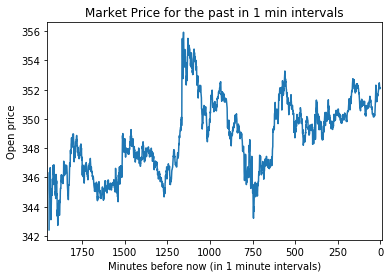

In [99]:
plotOpenPrices(TSLA_world)

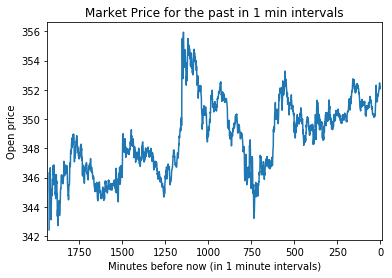

In [98]:
plotOpenPrices(tsla_df)